# Análisis estadístico

#Importación de librerias
import pandas as pd
from scipy.stats import norm
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import Normalize

In [36]:
import pandas as pd
from scipy.stats import norm
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
from matplotlib.colors import Normalize
from scipy.stats import shapiro, kstest
from scipy.stats import levene
from scipy.stats import kruskal
from matplotlib.colors import rgb2hex

In [2]:
dataset = pd.read_csv("C:/Users/user/Desktop/Machine-Learning/datos_pobreza.csv", encoding='cp1252')

In [3]:
dataset.head()

,Entidad Federativa,Poblacion,Nacimientos,Defunciones,Muertes Fetales,Muertes Maternas,Poblacion asegurada,Personas pobreza,Personas en pobreza extrema,Coeficiente GINI,Habitaciones por persona,Satisfacción con tiempo para ocio,Niveles de educación
0,AGS,1453452,21050,9712,341,10,794415,351529,15649,0.403162,1.1,7.8,48.2
1,BC,3690160,45075,28596,660,31,2298693,848437,59299,0.354443,1.1,7.8,49.6
2,BCS,821059,9867,5925,111,6,501431,151742,12583,0.372873,1.0,7.9,52.3
3,CAMP,1017011,12365,7509,158,9,487333,440423,93046,0.406862,0.9,7.8,44.6
4,COAH,3261259,44410,23814,501,27,2284366,691129,44529,0.368339,1.2,8.1,48.6


In [4]:
# Mostrar los nombres de las columnas del dataset
print(dataset.columns)

Index(['Entidad Federativa', 'Poblacion', 'Nacimientos', 'Defunciones',
       'Muertes Fetales', 'Muertes Maternas', 'Poblacion asegurada',
       'Personas pobreza', 'Personas en pobreza extrema', 'Coeficiente GINI',
       'Habitaciones por persona', 'Satisfacción con tiempo para ocio',
       'Niveles de educación'],
      dtype='object')


In [5]:
# Obtener estadísticas descriptivas para todas las variables numéricas
descripcion = dataset.describe()

# Mostrar las estadísticas descriptivas
print(descripcion)

          Poblacion    Nacimientos    Defunciones  Muertes Fetales  \
count  3.200000e+01      32.000000      32.000000        32.000000   
mean   4.030389e+06   51146.812500   34691.312500       718.062500   
std    3.364755e+06   38761.322056   31328.675719       791.735535   
min    7.972450e+05    9099.000000    5925.000000       111.000000   
25%    1.853814e+06   24962.250000   14644.750000       303.750000   
50%    3.151482e+06   40096.500000   25151.500000       461.500000   
75%    5.064805e+06   74376.750000   41501.250000       764.250000   
max    1.760343e+07  193476.000000  152090.000000      4356.000000   

       Muertes Maternas  Poblacion asegurada  Personas pobreza  \
count         32.000000         3.200000e+01      3.200000e+01   
mean          34.656250         1.837323e+06      1.638309e+06   
std           28.111081         1.591220e+06      1.619376e+06   
min            3.000000         4.308880e+05      1.517420e+05   
25%           14.500000         8.53102

In [41]:
# List of columns to plot
columns_to_plot = ['Poblacion', 'Nacimientos', 'Defunciones', 'Muertes Fetales', 
                   'Muertes Maternas', 'Poblacion asegurada', 'Personas pobreza', 
                   'Personas en pobreza extrema', 'Coeficiente GINI', 'Habitaciones por persona', 
                   'Satisfacción con tiempo para ocio','Niveles de educación']

# Lista de estados mexicanos
states = ['AGS', 'BC', 'BCS', 'CAMP', 'COAH', 'COL', 'CHIS', 'CHIH', 'CDMX', 'DGO', 
          'GTO', 'GRO', 'HGO', 'JAL', 'MEX', 'MICH', 'MOR', 'NAY', 'NL', 'OAX', 
          'PUE', 'QRO', 'QROO', 'SLP', 'SIN', 'SON', 'TAB', 'TAMP', 'TLAX', 'VER', 
          'YUC', 'ZAC']

In [7]:
# Calcular cuartiles, percentiles y deciles
for column in columns_to_plot:
    print(f"Análisis de la columna: {column}")
    print(f"Cuartiles:\n{dataset[column].quantile([0.25, 0.5, 0.75])}")
    print(f"Deciles:\n{dataset[column].quantile([i/10 for i in range(1, 10)])}")
    print(f"Percentiles (1% al 99%):\n{dataset[column].quantile([i/100 for i in range(1, 100)])}")
    print("\n")

Análisis de la columna: Poblacion
Cuartiles:
0.25    1853813.75
0.50    3151482.00
0.75    5064804.75
Name: Poblacion, dtype: float64
Deciles:
0.1    1315085.0
0.2    1694606.6
0.3    2130692.7
0.4    2714076.8
0.5    3151482.0
0.6    3675363.0
0.7    4066885.1
0.8    5787077.6
0.9    8308201.8
Name: Poblacion, dtype: float64
Percentiles (1% al 99%):
0.01      804627.34
0.02      812009.68
0.03      819392.02
0.04      868087.48
0.05      928832.60
           ...     
0.95     8775380.10
0.96     8904141.08
0.97     9605799.14
0.98    12271675.76
0.99    14937552.38
Name: Poblacion, Length: 99, dtype: float64


Análisis de la columna: Nacimientos
Cuartiles:
0.25    24962.25
0.50    40096.50
0.75    74376.75
Name: Nacimientos, dtype: float64
Deciles:
0.1    16686.7
0.2    23227.4
0.3    26869.7
0.4    35428.0
0.5    40096.5
0.6    44809.0
0.7    56307.5
0.8    77009.0
0.9    94345.7
Name: Nacimientos, dtype: float64
Percentiles (1% al 99%):
0.01      9337.08
0.02      9575.16
0.03      

In [8]:
#Test de Normalidad (Shapiro-Wilk, Kolmogorov-Smirnov)
for column in columns_to_plot:
    stat, p_value = shapiro(dataset[column])
    print(f'Shapiro-Wilk Test for {column}: p-value = {p_value}')
    
    stat, p_value = kstest(dataset[column], 'norm')
    print(f'Kolmogorov-Smirnov Test for {column}: p-value = {p_value}\n')

Shapiro-Wilk Test for Poblacion: p-value = 1.2217018035628202e-05
Kolmogorov-Smirnov Test for Poblacion: p-value = 0.0

Shapiro-Wilk Test for Nacimientos: p-value = 0.00020226885505023282
Kolmogorov-Smirnov Test for Nacimientos: p-value = 0.0

Shapiro-Wilk Test for Defunciones: p-value = 1.2080481827388402e-05
Kolmogorov-Smirnov Test for Defunciones: p-value = 0.0

Shapiro-Wilk Test for Muertes Fetales: p-value = 1.001613312078513e-07
Kolmogorov-Smirnov Test for Muertes Fetales: p-value = 0.0

Shapiro-Wilk Test for Muertes Maternas: p-value = 0.0005135685740462702
Kolmogorov-Smirnov Test for Muertes Maternas: p-value = 2.9557033643082153e-92

Shapiro-Wilk Test for Poblacion asegurada: p-value = 9.50400432530524e-06
Kolmogorov-Smirnov Test for Poblacion asegurada: p-value = 0.0

Shapiro-Wilk Test for Personas pobreza: p-value = 9.151816452646228e-06
Kolmogorov-Smirnov Test for Personas pobreza: p-value = 0.0

Shapiro-Wilk Test for Personas en pobreza extrema: p-value = 2.219533104709746

In [9]:
# Diccionario para almacenar los resultados
results = {}

# Definir umbral para p-valor significativo (ej. 0.05)
threshold = 0.05

# Iterar sobre los pares de columnas
for i in range(len(columns_to_plot)):
    for j in range(i + 1, len(columns_to_plot)):
        col1 = columns_to_plot[i]
        col2 = columns_to_plot[j]
        
        # Aplicar la prueba de Levene
        stat, p_value = levene(dataset[col1].dropna(), dataset[col2].dropna())
        
        # Guardar solo los resultados con p-valor menor que el umbral
        if p_value < threshold:
            results[f'{col1} vs {col2}'] = p_value

# Mostrar los resultados relevantes
for comparison, p_value in results.items():
    print(f"Levene's Test between {comparison}: p-value = {p_value:.6e}")

Levene's Test between Poblacion vs Nacimientos: p-value = 5.292127e-05
Levene's Test between Poblacion vs Defunciones: p-value = 5.023061e-05
Levene's Test between Poblacion vs Muertes Fetales: p-value = 4.373129e-05
Levene's Test between Poblacion vs Muertes Maternas: p-value = 4.360242e-05
Levene's Test between Poblacion vs Poblacion asegurada: p-value = 4.348867e-02
Levene's Test between Poblacion vs Personas pobreza: p-value = 4.772762e-02
Levene's Test between Poblacion vs Personas en pobreza extrema: p-value = 2.670391e-04
Levene's Test between Poblacion vs Coeficiente GINI: p-value = 4.359605e-05
Levene's Test between Poblacion vs Habitaciones por persona: p-value = 4.359607e-05
Levene's Test between Poblacion vs Satisfacción con tiempo para ocio: p-value = 4.359609e-05
Levene's Test between Poblacion vs Niveles de educación: p-value = 4.359759e-05
Levene's Test between Nacimientos vs Muertes Fetales: p-value = 5.957048e-06
Levene's Test between Nacimientos vs Muertes Maternas: 

In [10]:
# Diccionario para almacenar los resultados
results = {}

# Definir umbral para p-valor significativo (ej. 0.05)
threshold = 0.05

# Iterar sobre los pares de columnas
for i in range(len(columns_to_plot)):
    for j in range(i + 1, len(columns_to_plot)):
        col1 = columns_to_plot[i]
        col2 = columns_to_plot[j]
        
        # Aplicar la prueba de Kruskal-Wallis
        stat, p_value = kruskal(dataset[col1].dropna(), dataset[col2].dropna())
        
        # Guardar solo los resultados con p-valor menor que el umbral
        if p_value < threshold:
            results[f'{col1} vs {col2}'] = (stat, p_value)

# Imprimir resultados relevantes
for comparison, (stat, p_value) in results.items():
    print(f'Kruskal-Wallis Test between {comparison}: Estadístico H = {stat:.6f}, p-valor = {p_value:.6e}')

Kruskal-Wallis Test between Poblacion vs Nacimientos: Estadístico H = 47.261538, p-valor = 6.211923e-12
Kruskal-Wallis Test between Poblacion vs Defunciones: Estadístico H = 47.261538, p-valor = 6.211923e-12
Kruskal-Wallis Test between Poblacion vs Muertes Fetales: Estadístico H = 47.261538, p-valor = 6.211923e-12
Kruskal-Wallis Test between Poblacion vs Muertes Maternas: Estadístico H = 47.265867, p-valor = 6.198221e-12
Kruskal-Wallis Test between Poblacion vs Poblacion asegurada: Estadístico H = 14.439123, p-valor = 1.447635e-04
Kruskal-Wallis Test between Poblacion vs Personas pobreza: Estadístico H = 18.231490, p-valor = 1.956177e-05
Kruskal-Wallis Test between Poblacion vs Personas en pobreza extrema: Estadístico H = 43.996875, p-valor = 3.289006e-11
Kruskal-Wallis Test between Poblacion vs Coeficiente GINI: Estadístico H = 47.261538, p-valor = 6.211923e-12
Kruskal-Wallis Test between Poblacion vs Habitaciones por persona: Estadístico H = 47.777819, p-valor = 4.773624e-12
Kruskal-

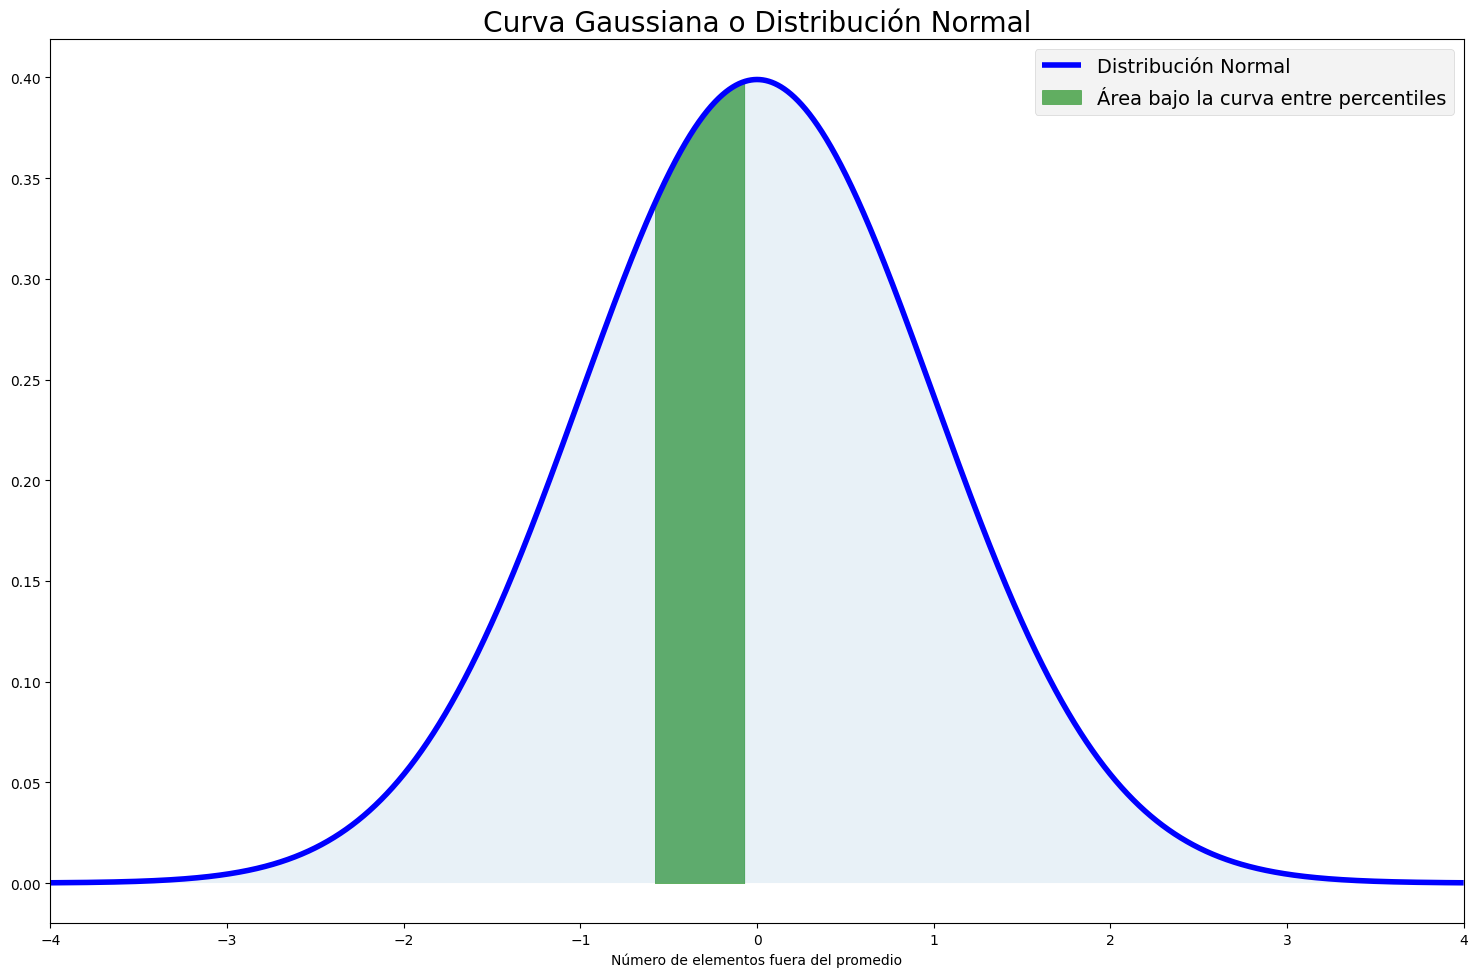

In [11]:
# Calcular estadísticas descriptivas de personas en pobreza extrema
media = dataset['Personas en pobreza extrema'].mean()
mediana = dataset['Personas en pobreza extrema'].median()
moda = dataset['Personas en pobreza extrema'].mode()[0]  # se utiliza [0] para obtener el primer valor de la serie
desviacion = dataset['Personas en pobreza extrema'].std()

# Extraer la columna de "Personas en pobreza extrema"
pobreza_extrema = dataset['Personas en pobreza extrema']

# Calcular la media (μ)
mu = np.mean(pobreza_extrema)

# Calcular la desviación estándar (σ)
sigma = np.std(pobreza_extrema)

# Calcular percentiles (25% y 75%)
x1 = np.percentile(pobreza_extrema, 25)
x2 = np.percentile(pobreza_extrema, 75)

# Calcular Z
z1 = (x1 - mu) / sigma
z2 = (x2 - mu) / sigma

# Graficar
x = np.arange(z1, z2, 0.0001)
x2 = np.arange(-10, 10, 0.0001)
y = norm.pdf(x, 0, 1)
y2 = norm.pdf(x2, 0, 1)

fig, ax = plt.subplots(figsize=(15, 10))  # Ajustar tamaño de la figura
plt.style.use("fivethirtyeight")
ax.plot(x2, y2, label='Distribución Normal', color='blue')
ax.fill_between(x, y, color="g", alpha=0.6, label='Área bajo la curva entre percentiles')
ax.fill_between(x2, y2, 0, alpha=0.1)
ax.set_xlim([-4, 4])
ax.set_xlabel("Número de elementos fuera del promedio")
ax.set_title("Curva Gaussiana o Distribución Normal")
ax.legend()

plt.tight_layout()  # Ajustar el diseño para que no se corten los elementos
plt.savefig("gaussiana.png", dpi=300)  # Guardar la figura con alta resolución
plt.show()

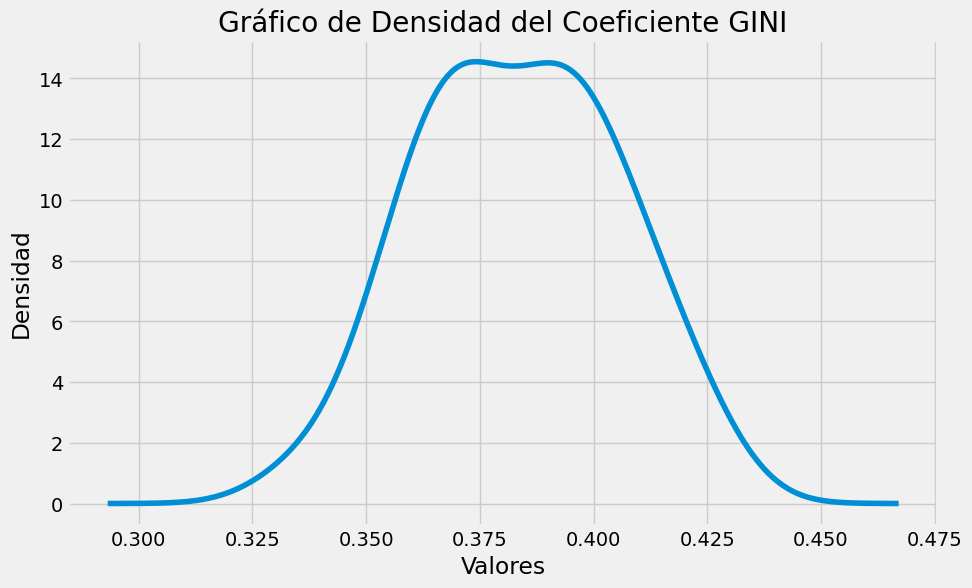

In [12]:
# Calcular cuartiles, percentiles y deciles
cuartiles = np.percentile(dataset['Coeficiente GINI'], [25, 50, 75])
percentiles = np.percentile(dataset['Coeficiente GINI'], [10, 20, 30, 40, 50, 60, 70, 80, 90])
deciles = np.percentile(dataset['Coeficiente GINI'], np.arange(10, 100, 10))

# Crear el gráfico de densidad utilizando la función plot() de Pandas
plt.figure(figsize=(10, 6))
dataset['Coeficiente GINI'].plot(kind='density')
plt.title('Gráfico de Densidad del Coeficiente GINI')
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()

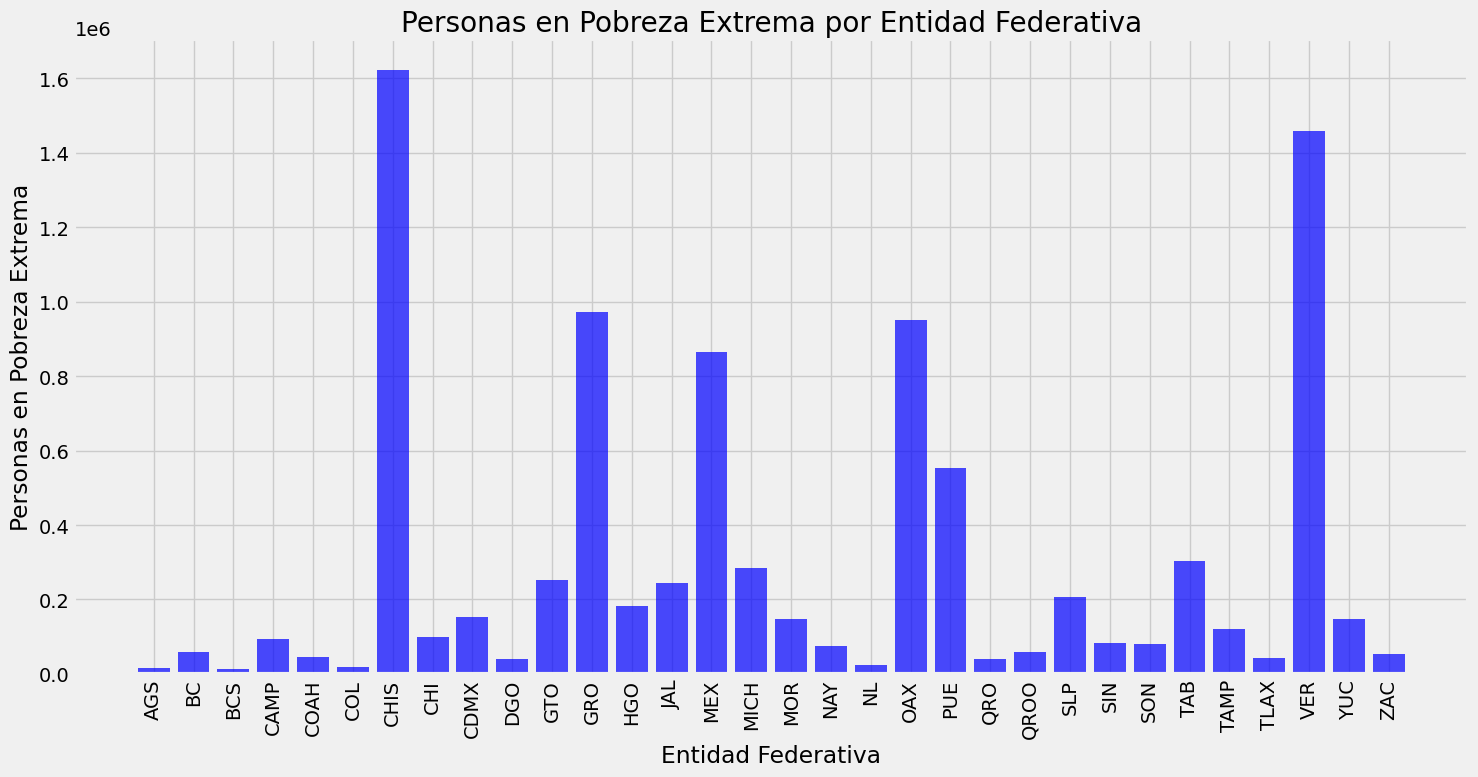

In [13]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(15, 8))

# Crear un gráfico de barras
plt.bar(dataset['Entidad Federativa'], dataset['Personas en pobreza extrema'], color='blue', alpha=0.7)

# Añadir títulos y etiquetas
plt.title('Personas en Pobreza Extrema por Entidad Federativa')
plt.xlabel('Entidad Federativa')
plt.ylabel('Personas en Pobreza Extrema')

# Rotar las etiquetas del eje x para que sean más legibles
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.tight_layout()  # Ajusta el layout para que no se corten las etiquetas
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_12028\4140072771.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('rainbow')


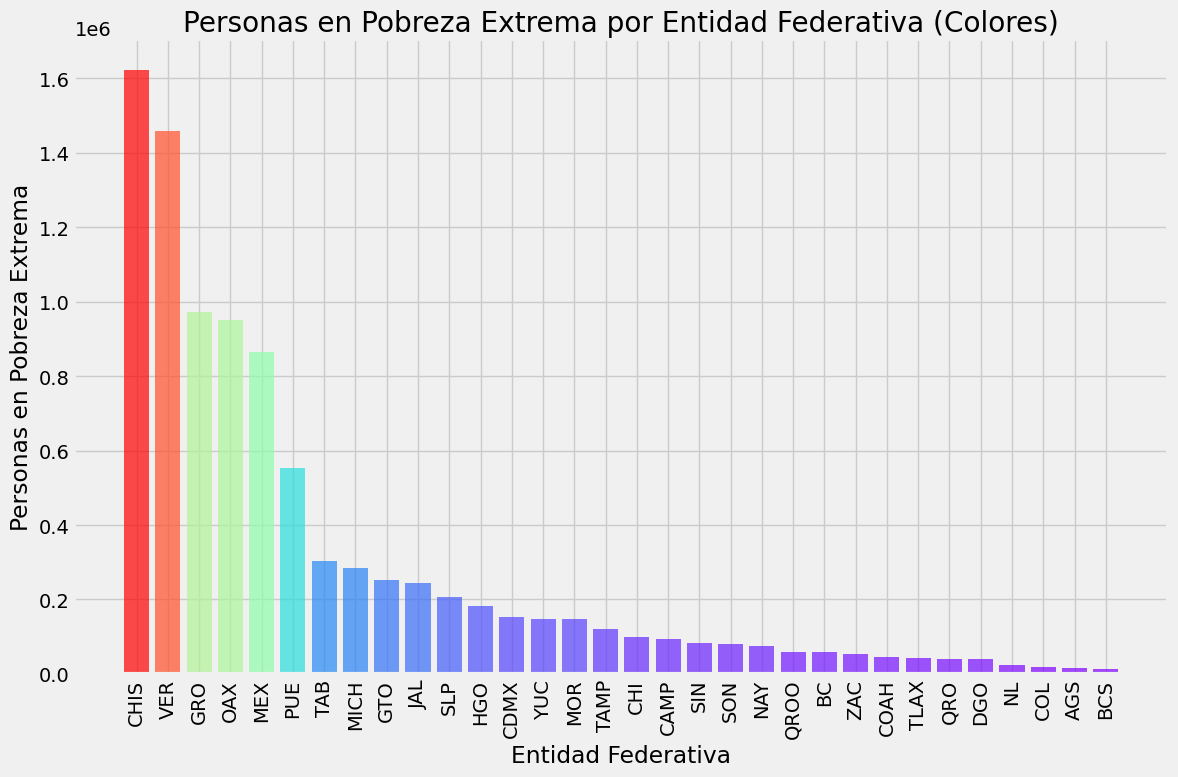

In [14]:
# Ordenar los datos por la columna 'Personas en pobreza extrema'
dataset_ordenado = dataset.sort_values('Personas en pobreza extrema', ascending=False)

# Crear una escala de colores rojos ('Reds')
colormap = cm.get_cmap('rainbow')

# Normalizar los datos para asignar colores de manera gradual
norm = plt.Normalize(vmin=min(dataset_ordenado['Personas en pobreza extrema']), 
                     vmax=max(dataset_ordenado['Personas en pobreza extrema']))

# Generar los colores de las barras basado en los valores de 'Personas en pobreza extrema'
colors = colormap(norm(dataset_ordenado['Personas en pobreza extrema']))

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(dataset_ordenado['Entidad Federativa'], dataset_ordenado['Personas en pobreza extrema'], color=colors, alpha=0.7)

# Añadir etiquetas y título
plt.xlabel('Entidad Federativa')
plt.ylabel('Personas en Pobreza Extrema')
plt.title('Personas en Pobreza Extrema por Entidad Federativa (Colores)')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [15]:
# Lista de colores (agregados colores adicionales)
colores = ['steelblue', 'forestgreen', 'firebrick', 'goldenrod', 'darkviolet', 'indianred', 
           'darkcyan', 'darkred', 'chocolate', 'navy', 'darkmagenta', 'teal']

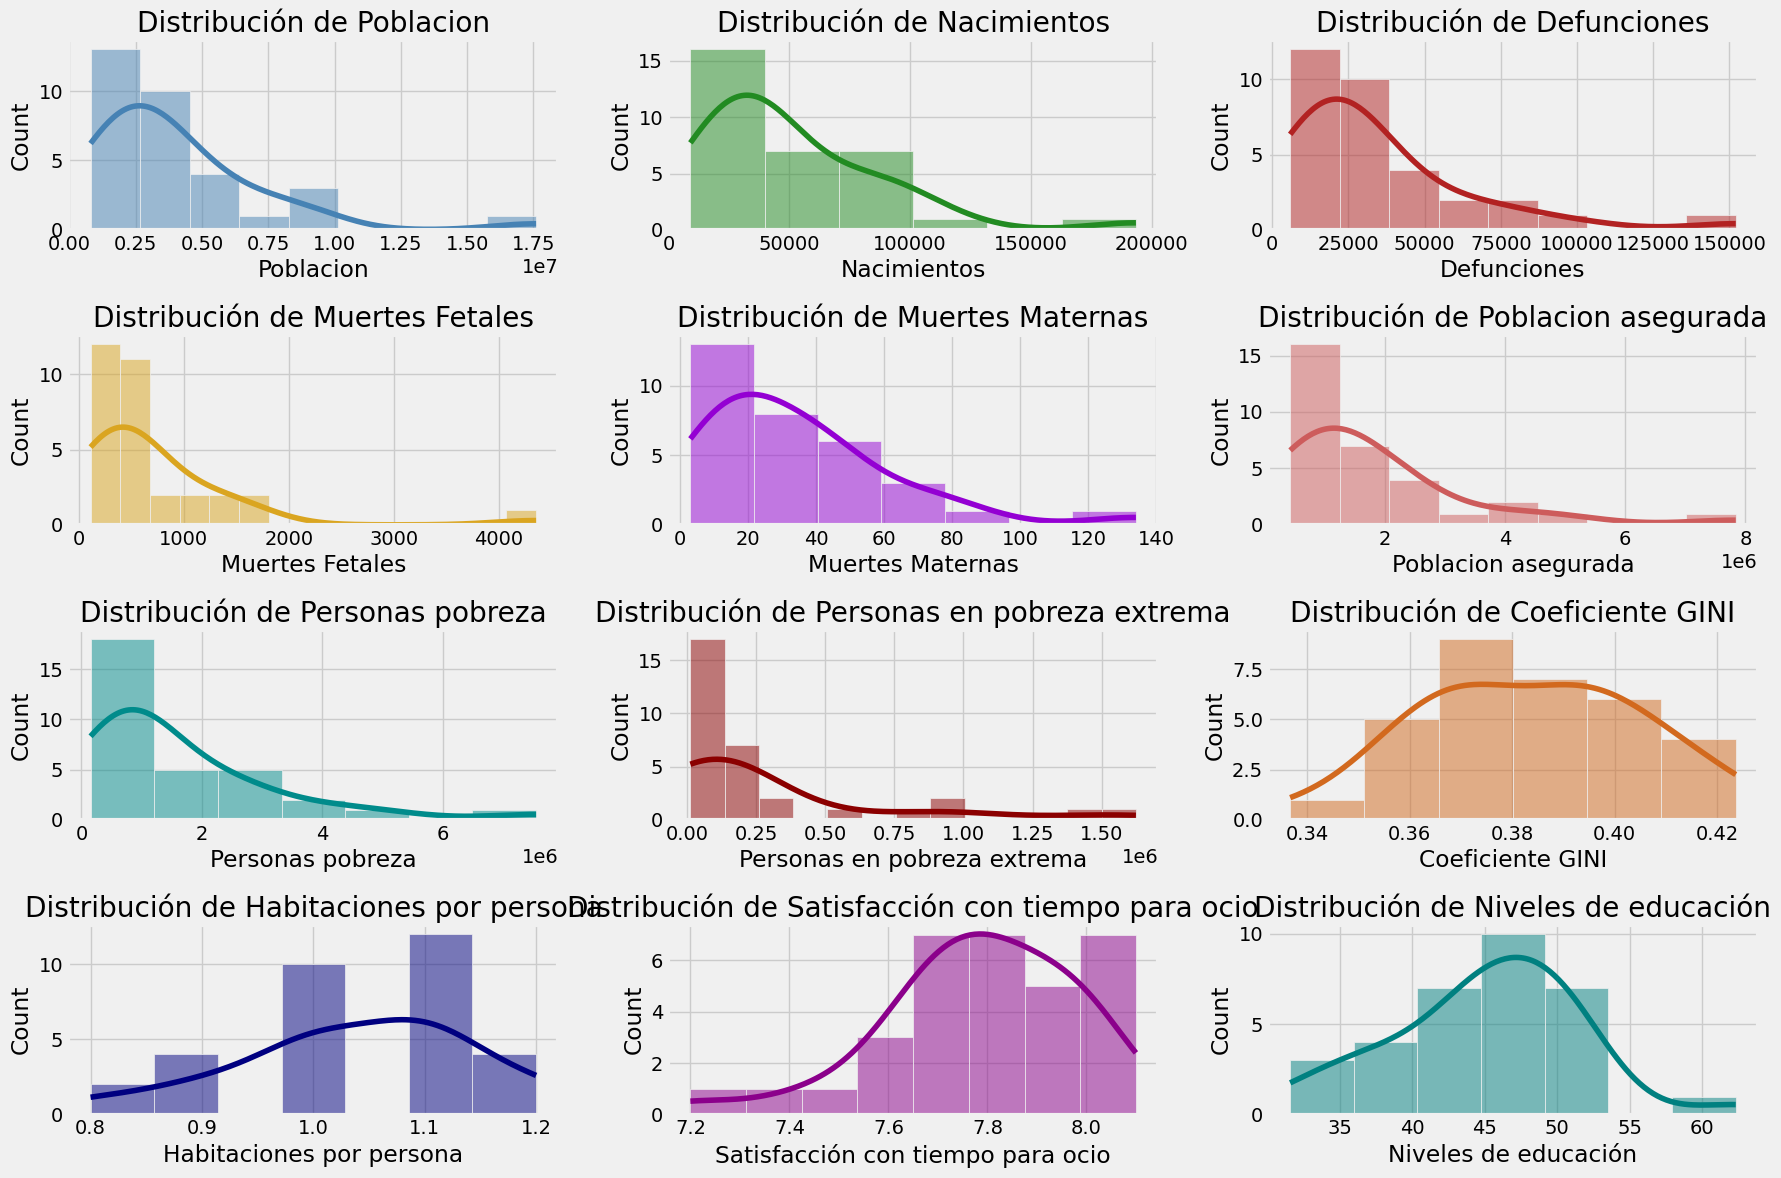

In [16]:
# Graficar las distribuciones normales
plt.figure(figsize=(18, 12))

for i, column in enumerate(columns_to_plot):
    plt.subplot(4, 3, i + 1)  # Cambia el layout a 4 filas y 3 columnas
    sns.histplot(dataset[column], kde=True, color=colores[i % len(colores)])  # Aplicar color a cada gráfica
    plt.title(f'Distribución de {column}')

plt.tight_layout()
plt.show()

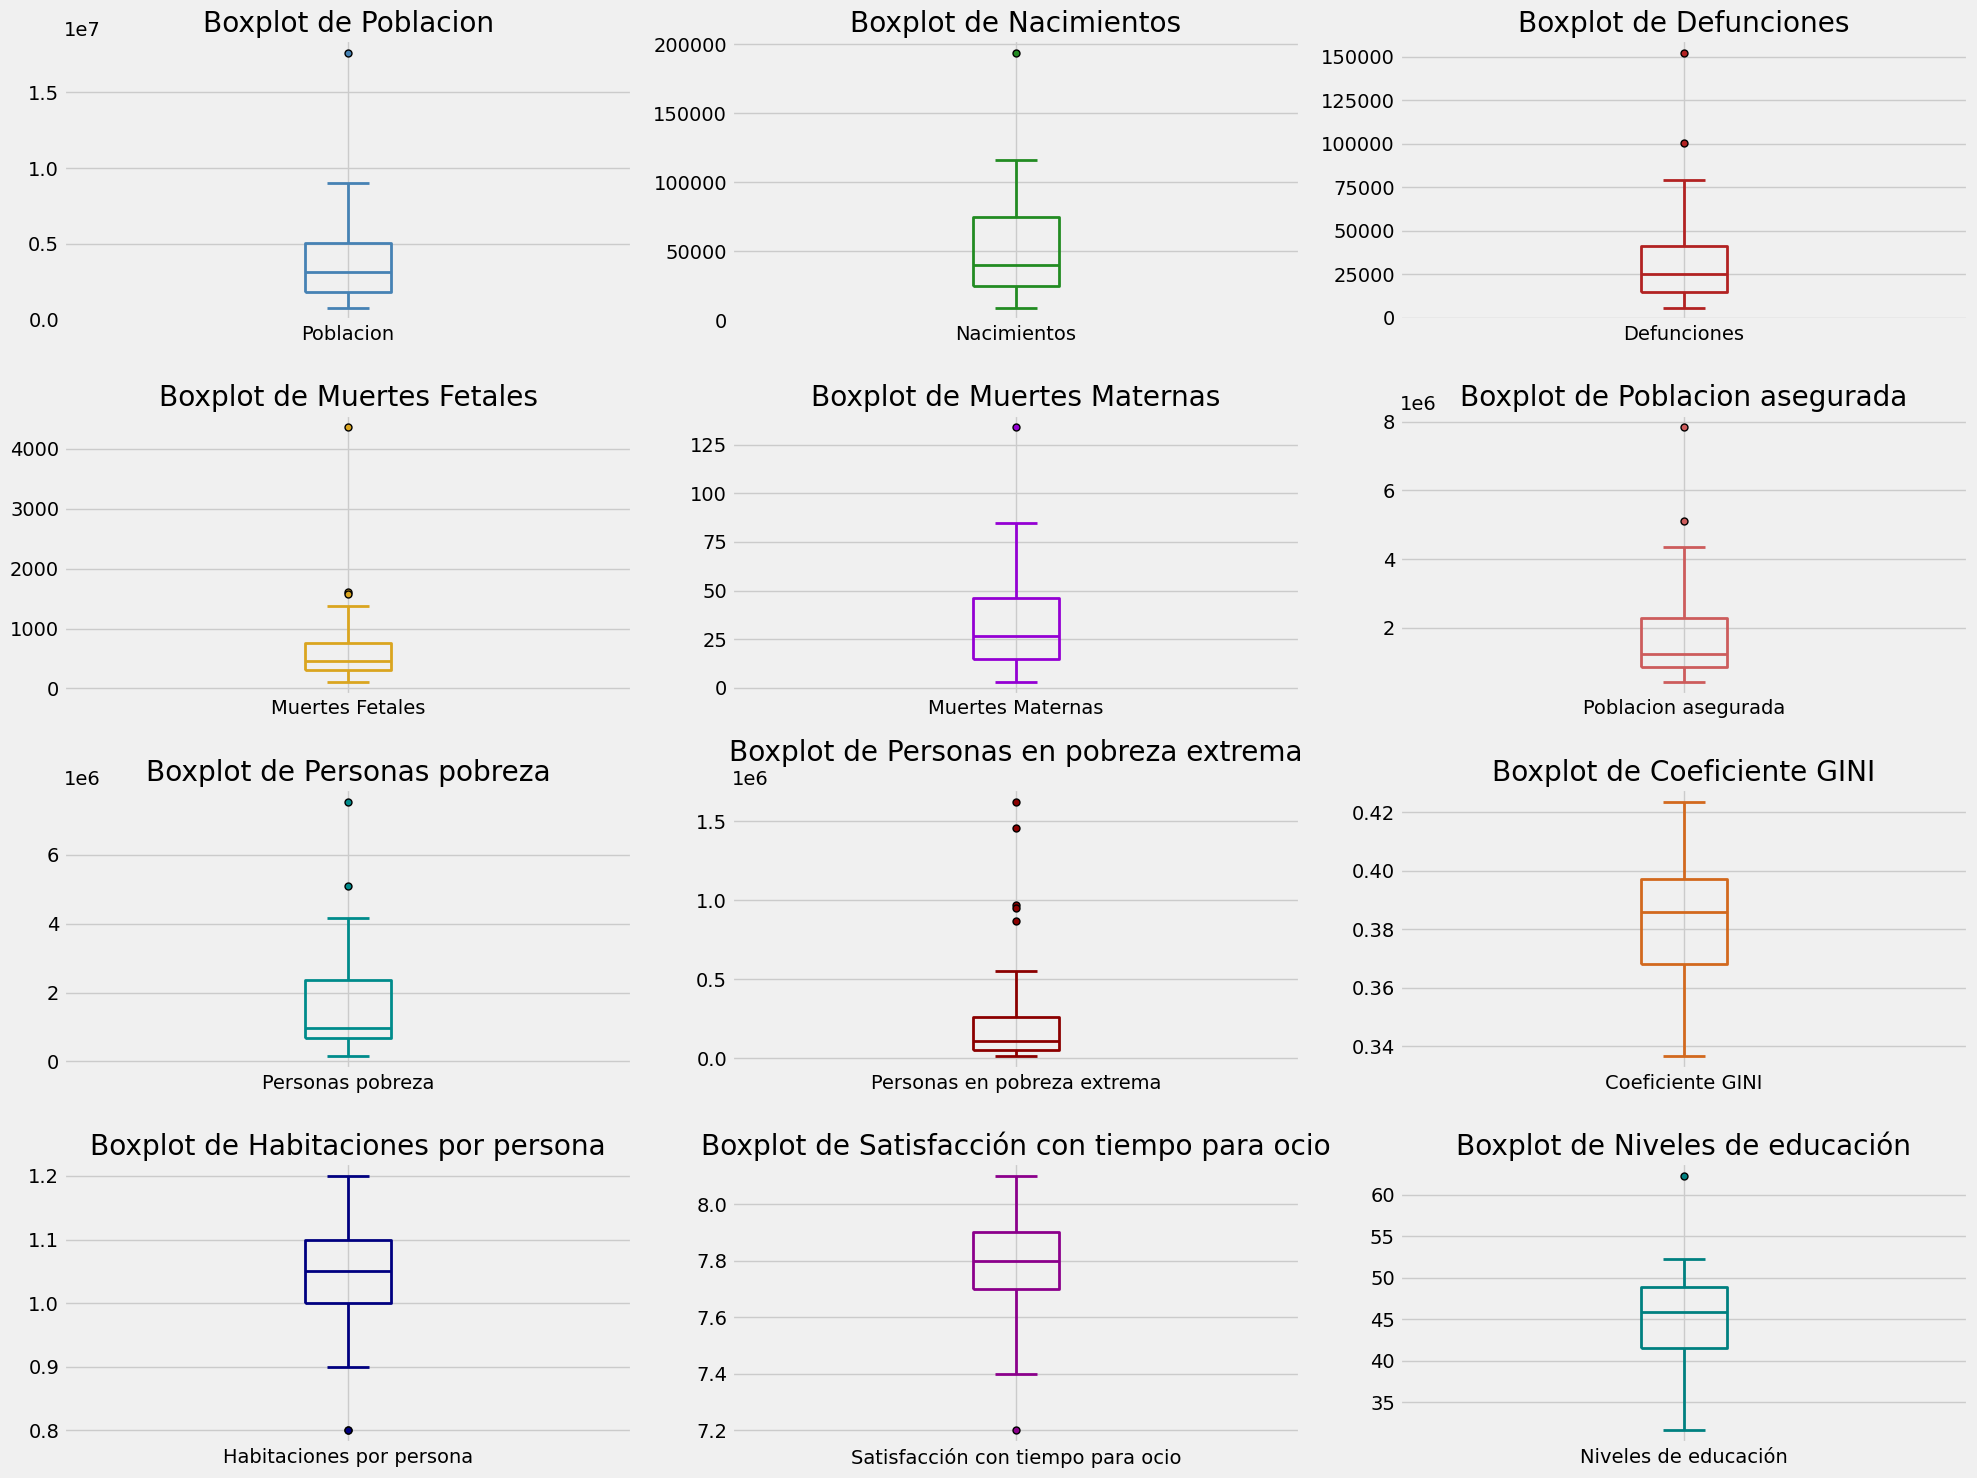

In [17]:
# Configurar el tamaño de la figura
plt.figure(figsize=(20, 15))

# Crear un boxplot para cada columna con un color diferente y líneas más gruesas
for i, (col, color) in enumerate(zip(columns_to_plot, colores)):
    plt.subplot(4, 3, i + 1)  # Crear una grilla de 4 filas x 3 columnas para los gráficos
    dataset.boxplot(column=[col], 
                    boxprops=dict(color=color, linewidth=2), 
                    whiskerprops=dict(color=color, linewidth=2), 
                    capprops=dict(color=color, linewidth=2), 
                    medianprops=dict(color=color, linewidth=2), 
                    flierprops=dict(markerfacecolor=color, marker='o', markersize=5))  # Definir color y grosor para cada elemento
    plt.title(f'Boxplot de {col}')

# Ajustar el espacio entre los gráficos
plt.tight_layout()
plt.show()

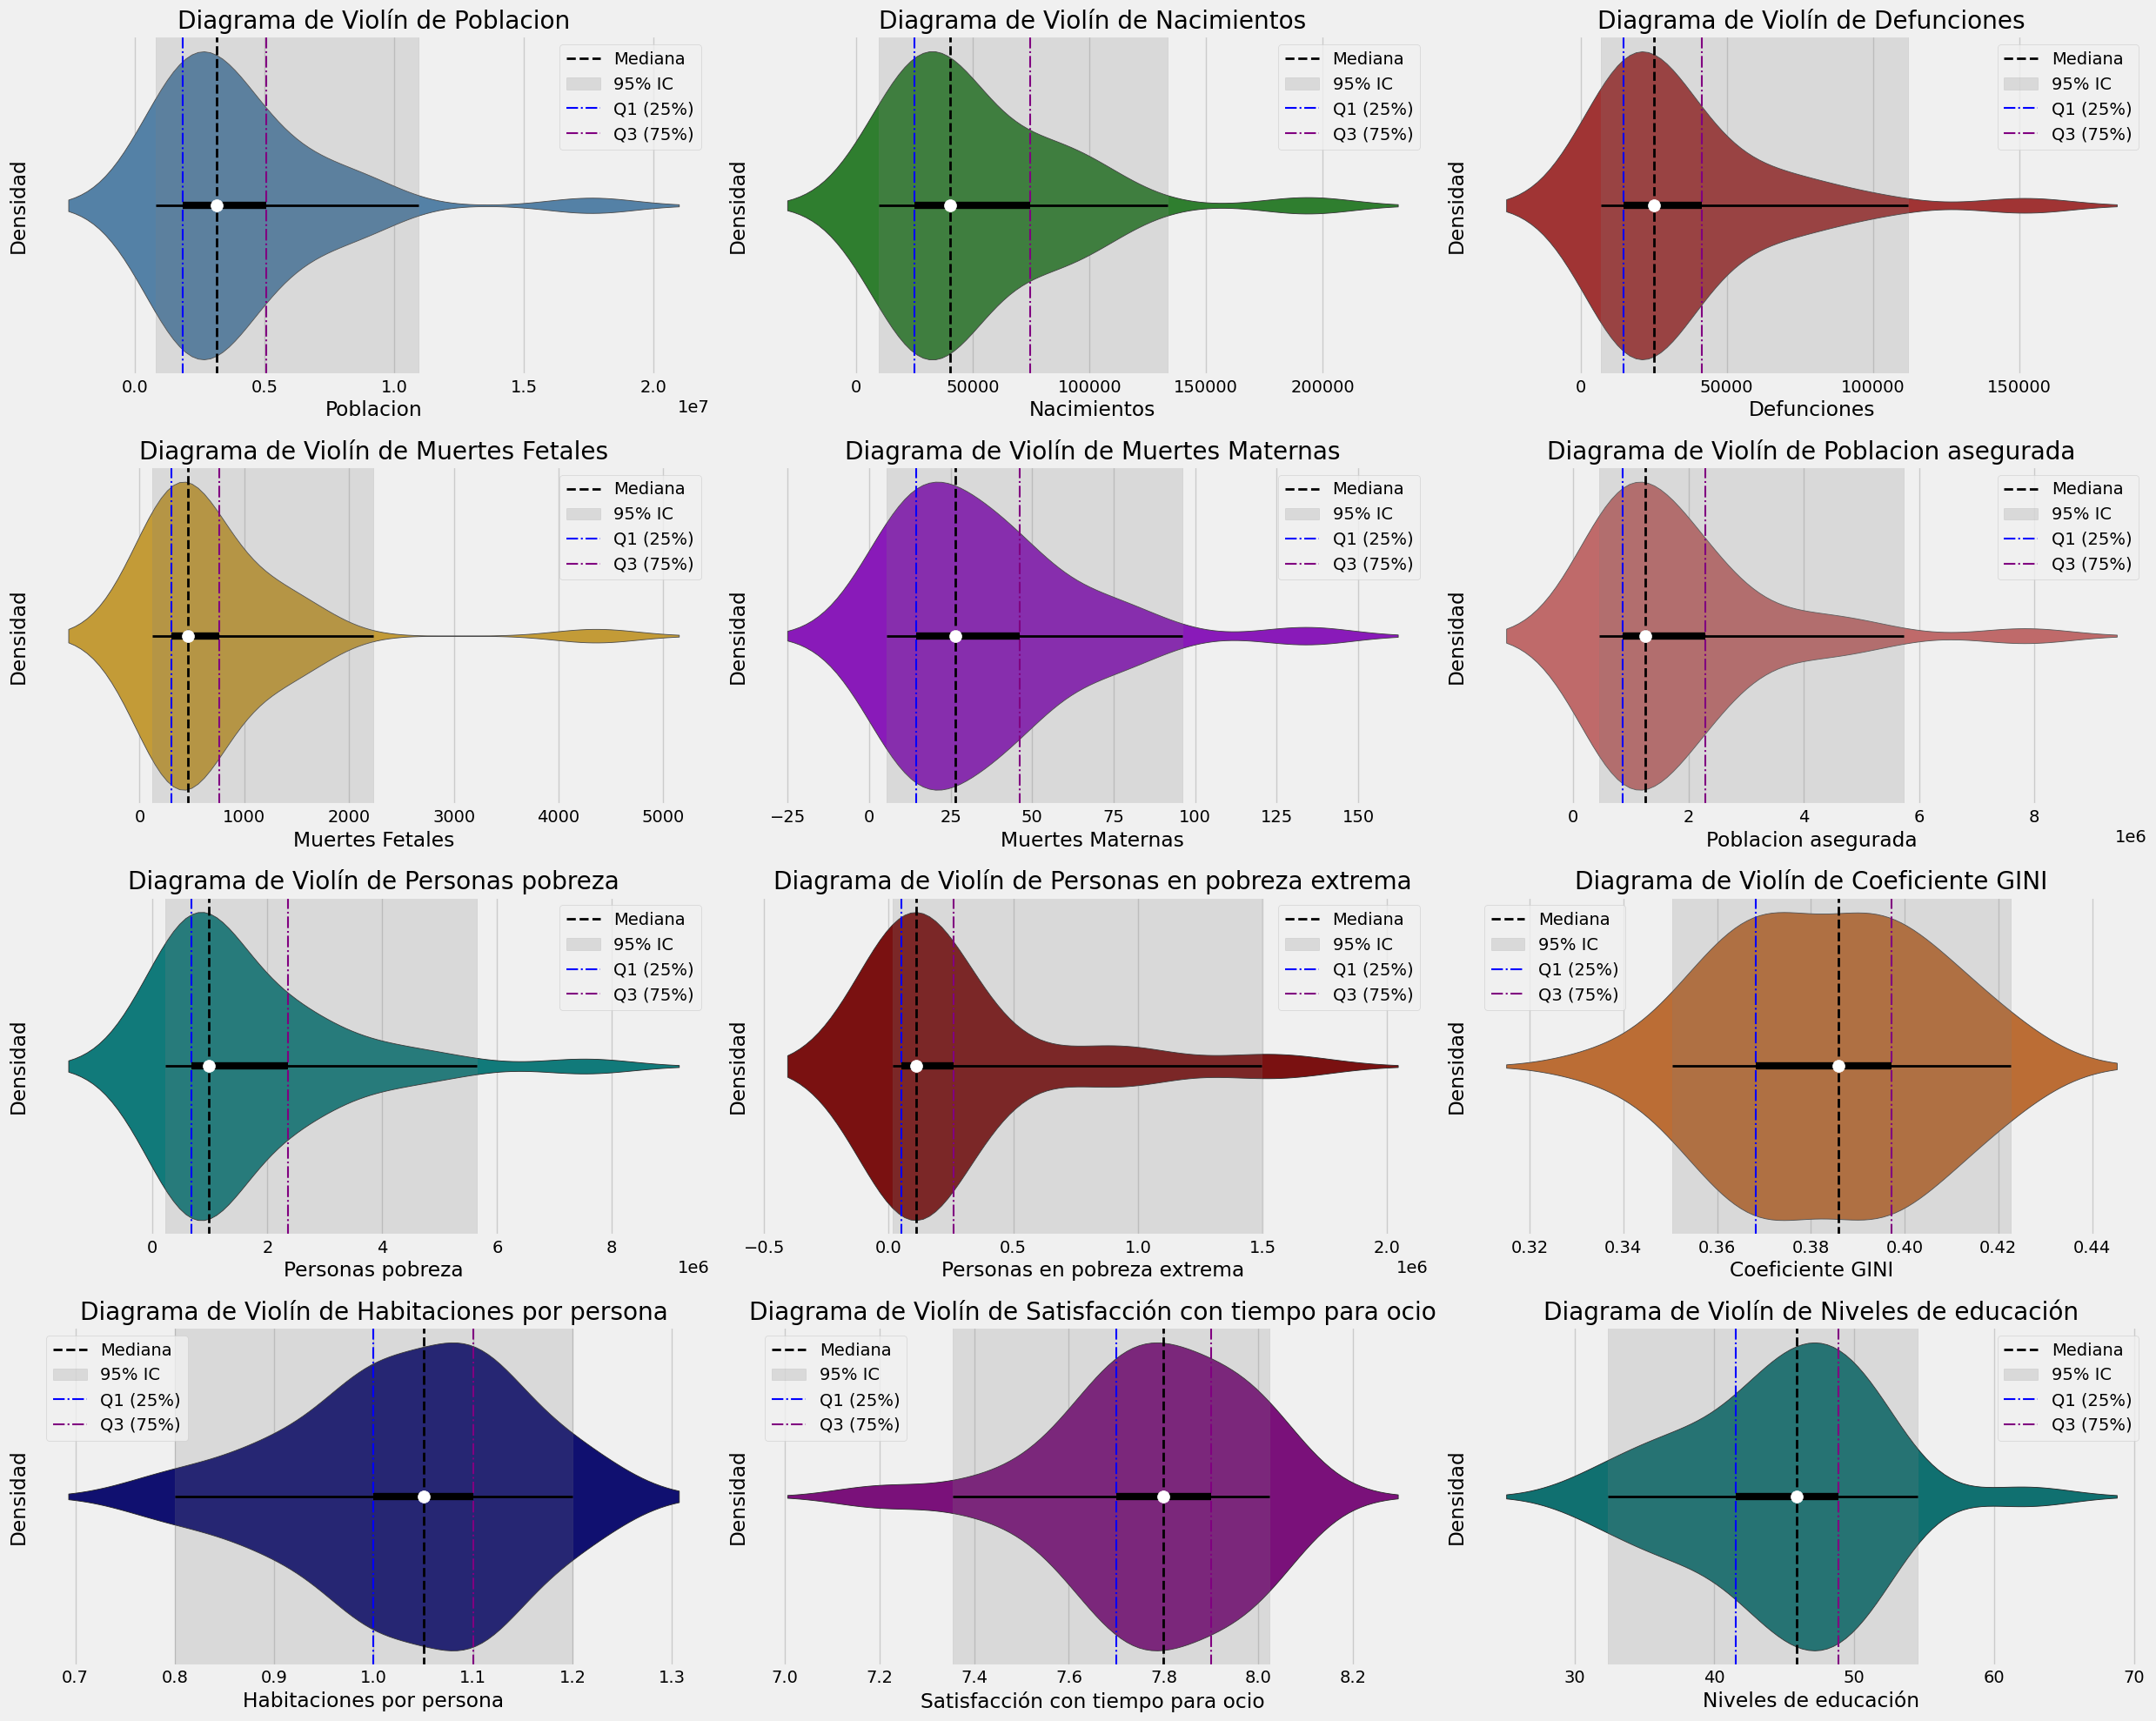

In [18]:
# Configurar el tamaño de la figura
plt.figure(figsize=(25, 20))

# Crear un diagrama de violín para cada columna con un color diferente
for i, (col, color) in enumerate(zip(columns_to_plot, colores)):
    plt.subplot(4, 3, i + 1)  # Crear una grilla de 4 filas x 3 columnas para los gráficos
    
    # Crear diagrama de violín con la mediana como punto blanco y líneas negras para IQR y 95% CI
    sns.violinplot(data=dataset, x=col, color=color, inner=None)  # Sin cuartiles internos para personalizar

    # Calcular estadísticas
    col_data = dataset[col].dropna()  # Asegurarse de que no haya valores NaN
    median = np.median(col_data)
    q1 = np.percentile(col_data, 25)  # Primer cuartil
    q3 = np.percentile(col_data, 75)  # Tercer cuartil
    iqr = q3 - q1  # Rango intercuartílico
    ci_lower = np.percentile(col_data, 2.5)  # Límite inferior del 95% IC
    ci_upper = np.percentile(col_data, 97.5)  # Límite superior del 95% IC

    # Agregar la mediana, el rango intercuartílico y el intervalo de confianza
    plt.axvline(median, color='black', linestyle='--', linewidth=2, label='Mediana')
    plt.axvspan(ci_lower, ci_upper, color='gray', alpha=0.2, label='95% IC')
    plt.axvline(q1, color='blue', linestyle='-.', linewidth=1.5, label='Q1 (25%)')
    plt.axvline(q3, color='purple', linestyle='-.', linewidth=1.5, label='Q3 (75%)')
    
    # Añadir línea negra gruesa para el IQR
    plt.plot([q1, q3], [0, 0], color='black', linewidth=6, zorder=3)  # Barra gruesa para el IQR
    
    # Añadir línea negra fina para el intervalo de confianza del 95%
    plt.plot([ci_lower, ci_upper], [0, 0], color='black', linewidth=2, zorder=2)  # Barra fina para el 95% IC
    
    # Añadir el punto blanco para la mediana
    plt.scatter([median], [0], color='white', s=100, zorder=4)  # Punto blanco para la mediana
    
    plt.title(f'Diagrama de Violín de {col}')
    plt.xlabel(col)
    plt.ylabel('Densidad')
    plt.legend()  # Mostrar la leyenda para identificar las estadísticas

# Ajustar el espacio entre los gráficos
plt.tight_layout()
plt.show()

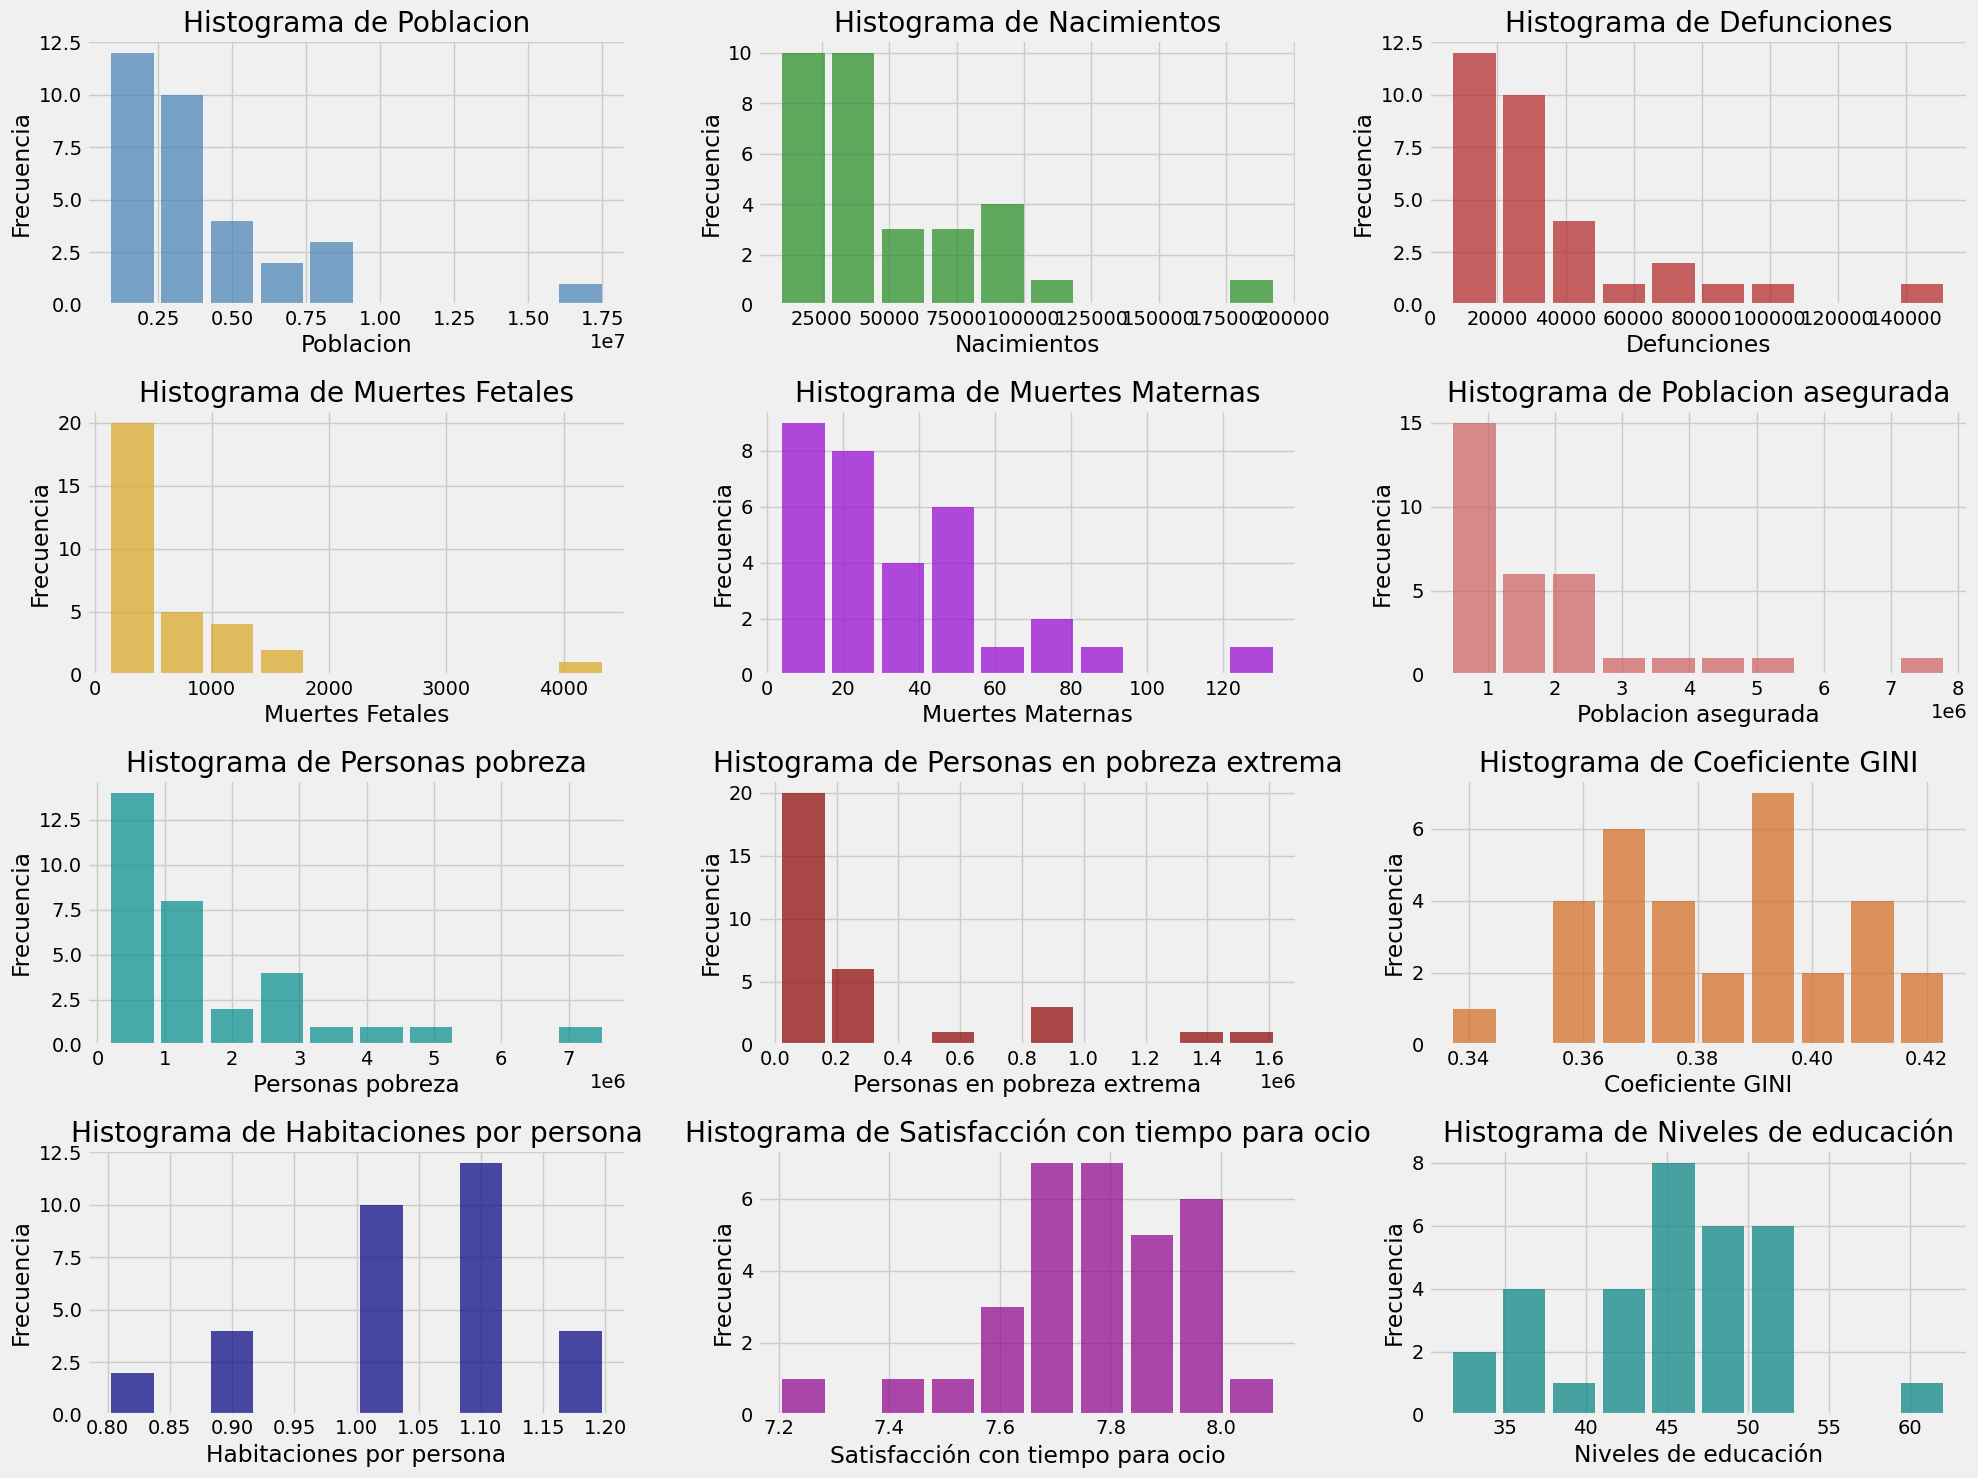

In [19]:
# Configurar el tamaño de la figura
plt.figure(figsize=(20, 15))

# Crear un histograma para cada columna con un color diferente
for i, (col, color) in enumerate(zip(columns_to_plot, colores)):
    # Verificar si la columna existe en el dataset antes de graficar
    if col in dataset.columns:
        plt.subplot(4, 3, i + 1)  # Crear una grilla de 4 filas x 3 columnas para los gráficos
        plt.hist(dataset[col], bins=10, color=color, alpha=0.7, rwidth=0.85)  # Crear el histograma con color personalizado
        plt.title(f'Histograma de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
    else:
        print(f"La columna '{col}' no existe en el dataset.")

# Ajustar el espacio entre los gráficos
plt.tight_layout()
plt.show()

In [40]:
# Filtrar las columnas que quieres usar
columns_to_use = ['Poblacion', 'Nacimientos', 'Defunciones', 'Muertes Fetales', 'Muertes Maternas', 
                  'Poblacion asegurada', 'Personas pobreza', 'Personas en pobreza extrema', 'Coeficiente GINI',
                  'Habitaciones por persona', 'Satisfacción con tiempo para ocio', 'Niveles de educación']
data = dataset[columns_to_use]

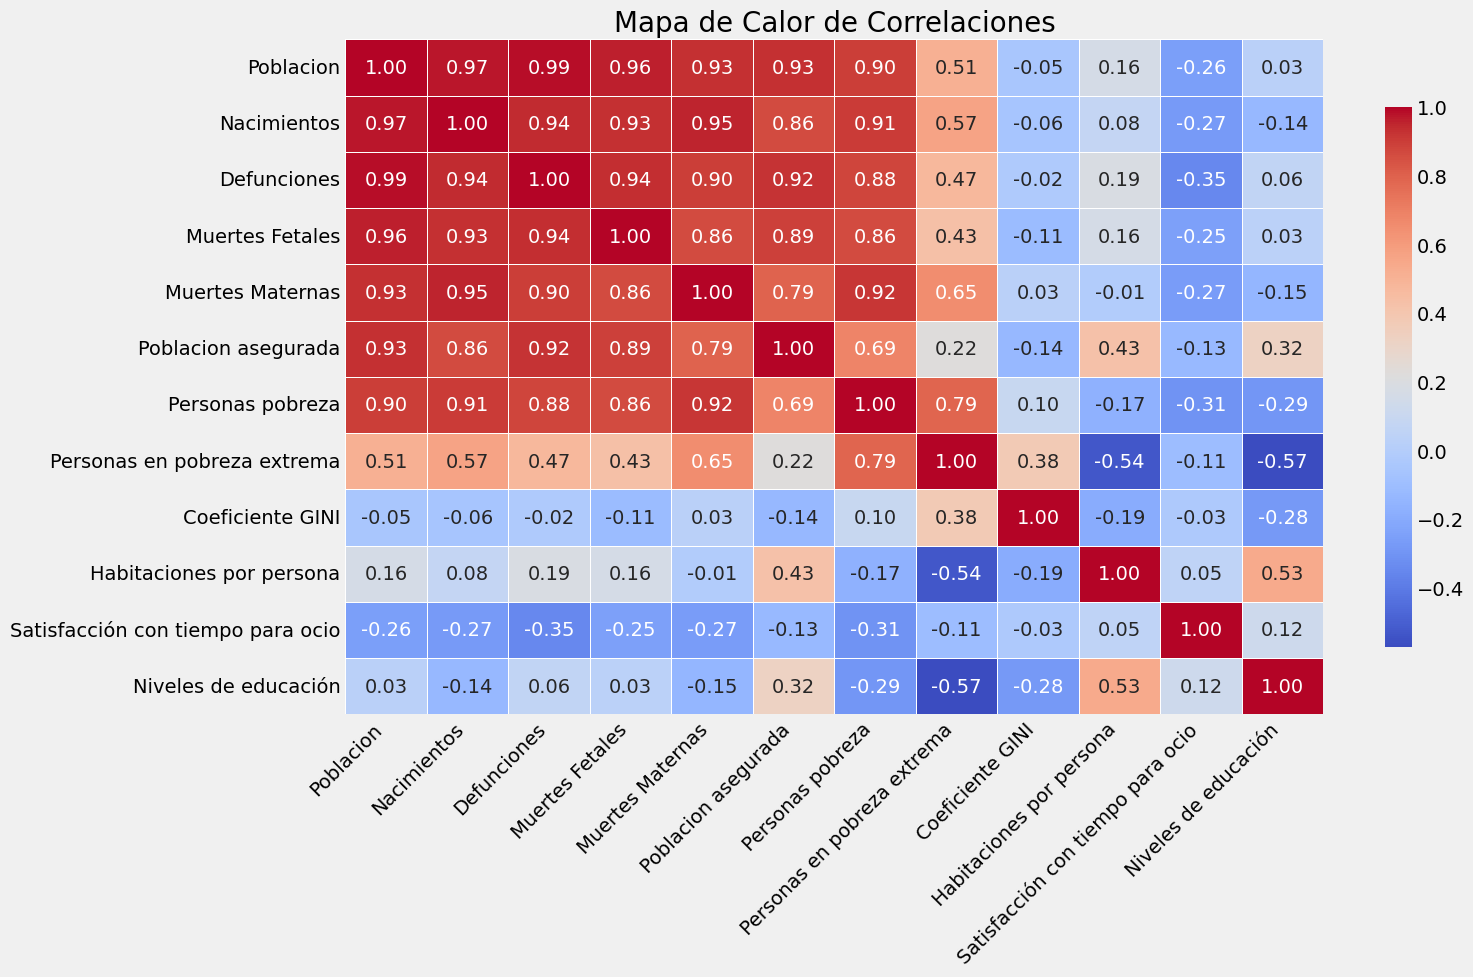

In [21]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(16, 10))  # Puedes ajustar el tamaño según tus necesidades

# Crear el mapa de calor de la matriz de correlación
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f",
            cbar_kws={"shrink": .8})

# Configurar el título y el tamaño de la fuente
plt.title('Mapa de Calor de Correlaciones', fontsize=20)
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mayor legibilidad
plt.yticks(rotation=0)  # Mantener etiquetas del eje y horizontales

# Ajustar el diseño para que todos los elementos sean visibles
plt.tight_layout()

# Mostrar el gráfico
plt.show()

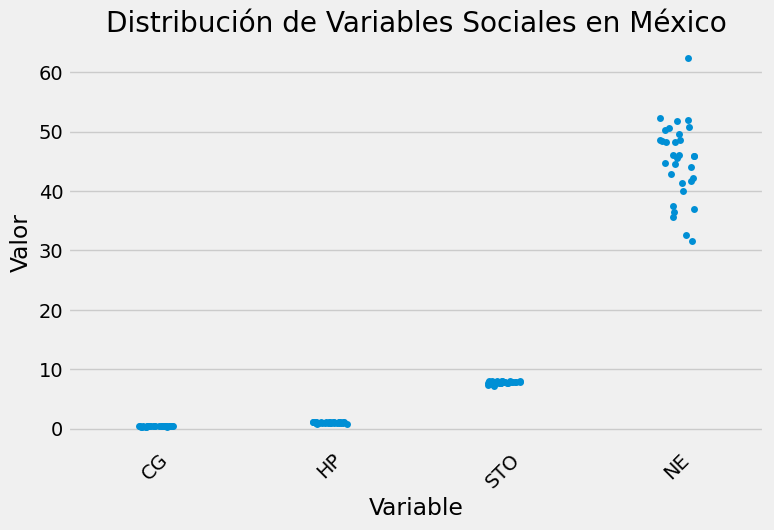

In [22]:
# Lista de columnas de interés
variables_interes = ['Coeficiente GINI', 
                     'Habitaciones por persona', 'Satisfacción con tiempo para ocio', 
                     'Niveles de educación']

# Diccionario de siglas
siglas_dict = {
    'Coeficiente GINI': 'CG',
    'Habitaciones por persona': 'HP',
    'Satisfacción con tiempo para ocio': 'STO',
    'Niveles de educación': 'NE'
}

# Renombrar las columnas en el DataFrame usando el diccionario de siglas
dataset_renamed = dataset.rename(columns=siglas_dict)

# Transformar el DataFrame al formato largo (melted) con nombres en siglas
df_melted = pd.melt(dataset_renamed, value_vars=siglas_dict.values(), 
                    var_name='Variable', value_name='Valor')

# Crear el gráfico de stripplot con tamaño reducido
plt.figure(figsize=(8, 5))  # Tamaño reducido a la mitad
sns.stripplot(data=df_melted, x='Variable', y='Valor', jitter=True)
plt.ylabel('Valor')
plt.xlabel('Variable')
plt.title('Distribución de Variables Sociales en México')
plt.xticks(rotation=45)
plt.show()

In [25]:
# Definir los datos mínimos y máximos para cada columna
min_values = {
    'Poblacion': 797245,
    'Nacimientos': 9099,
    'Defunciones': 5925,
    'Muertes Fetales': 111,
    'Muertes Maternas': 3,
    'Poblacion asegurada': 430888,
    'Personas pobreza': 151742,
    'Personas en pobreza extrema': 12583,
    'Coeficiente GINI': 0.336655,
    'Habitaciones por persona': 1,
    'Satisfacción con tiempo para ocio': 0,
    'Niveles de educación': 0
}

vmax_values = {
    'Poblacion': 17603430,
    'Nacimientos': 193476,
    'Defunciones': 152090,
    'Muertes Fetales': 4356,
    'Muertes Maternas': 134,
    'Poblacion asegurada': 7838057,
    'Personas pobreza': 7546542,
    'Personas en pobreza extrema': 1623286,
    'Coeficiente GINI': 0.423615,
    'Habitaciones por persona': 5,
    'Satisfacción con tiempo para ocio': 10,
    'Niveles de educación': 5
}

In [27]:
# Normalizar los datos según los valores mínimos y máximos
normalized_data = data.copy()
for column in columns_to_use:
    normalized_data[column] = (data[column] - min_values[column]) / (vmax_values[column] - min_values[column])

In [32]:
# Función para aplicar estilo
def highlight_extreme_values(column):
    return [
        'background-color: red' if val == column.max() else 
        'background-color: green' if val == column.min() else 
        '' for val in column
    ]

In [33]:
# Aplicar el estilo a la tabla
styled_table = data.style.apply(highlight_extreme_values, subset=columns_to_use, axis=0)

# Mostrar la tabla estilizada
styled_table

,Poblacion,Nacimientos,Defunciones,Muertes Fetales,Muertes Maternas,Poblacion asegurada,Personas pobreza,Personas en pobreza extrema,Coeficiente GINI,Habitaciones por persona,Satisfacción con tiempo para ocio,Niveles de educación
0,1453452,21050,9712,341,10,794415,351529,15649,0.403162,1.100000,7.800000,48.200000
1,3690160,45075,28596,660,31,2298693,848437,59299,0.354443,1.100000,7.800000,49.600000
2,821059,9867,5925,111,6,501431,151742,12583,0.372873,1.000000,7.900000,52.300000
3,1017011,12365,7509,158,9,487333,440423,93046,0.406862,0.900000,7.800000,44.600000
4,3261259,44410,23814,501,27,2284366,691129,44529,0.368339,1.200000,8.100000,48.600000
5,797245,9099,7121,127,3,451198,235620,18248,0.354837,1.000000,8.000000,48.400000
6,5812375,89194,39865,1224,66,1280354,4174596,1623286,0.412933,0.800000,8.000000,31.600000
7,3836506,48119,31716,710,37,2295780,1005732,99838,0.422289,1.200000,7.700000,45.500000
8,9003827,77476,100363,1617,47,5121616,2682730,153332,0.407914,1.200000,7.500000,62.300000
9,1884622,27611,13750,411,18,1021252,680042,40412,0.370328,1.100000,7.900000,42.200000


In [45]:
# Asignar los nombres de los estados como índice
data.index = states

In [46]:
# Función para aplicar una escala de colores a cada columna
def apply_gradient(column):
    # Crear una paleta de colores (verde a rojo)
    cmap = sns.color_palette("RdYlGn_r", as_cmap=True)
    norm = (column - column.min()) / (column.max() - column.min())
    return [f"background-color: {rgb2hex(cmap(value))}" for value in norm]

In [47]:
# Aplicar el estilo a la tabla con escala de colores
styled_table = data.style.apply(apply_gradient, subset=columns_to_use, axis=0)

# Mostrar la tabla estilizada
styled_table

,Poblacion,Nacimientos,Defunciones,Muertes Fetales,Muertes Maternas,Poblacion asegurada,Personas pobreza,Personas en pobreza extrema,Coeficiente GINI,Habitaciones por persona,Satisfacción con tiempo para ocio,Niveles de educación
AGS,1453452,21050,9712,341,10,794415,351529,15649,0.403162,1.100000,7.800000,48.200000
BC,3690160,45075,28596,660,31,2298693,848437,59299,0.354443,1.100000,7.800000,49.600000
BCS,821059,9867,5925,111,6,501431,151742,12583,0.372873,1.000000,7.900000,52.300000
CAMP,1017011,12365,7509,158,9,487333,440423,93046,0.406862,0.900000,7.800000,44.600000
COAH,3261259,44410,23814,501,27,2284366,691129,44529,0.368339,1.200000,8.100000,48.600000
COL,797245,9099,7121,127,3,451198,235620,18248,0.354837,1.000000,8.000000,48.400000
CHIS,5812375,89194,39865,1224,66,1280354,4174596,1623286,0.412933,0.800000,8.000000,31.600000
CHIH,3836506,48119,31716,710,37,2295780,1005732,99838,0.422289,1.200000,7.700000,45.500000
CDMX,9003827,77476,100363,1617,47,5121616,2682730,153332,0.407914,1.200000,7.500000,62.300000
DGO,1884622,27611,13750,411,18,1021252,680042,40412,0.370328,1.100000,7.900000,42.200000
